<a href="https://colab.research.google.com/github/Niraj-kumbhar/CitiBike-NYC-2020/blob/main/EDA_CitiBikeHistory2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citi Bike Data Analysis
Data available on : [Citi Bike](https://s3.amazonaws.com/tripdata/index.html)

Citi Bike is a privately owned public bicycle sharing system serving the New York City boroughs of the Bronx, Brooklyn, Manhattan, and Queens, as well as Jersey City, New Jersey, and Hoboken, New Jersey.

You can find documentation related to data [here](https://ride.citibikenyc.com/system-data)

I have taken data for year 2020 and will do some analysis


## Loading required libraries

In [ ]:
#for handling data
import pandas as pd
import numpy as np

# for vizualization
import seaborn as sns
sns.set()
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from  matplotlib.lines import Line2D
%matplotlib inline
import plotly.express as px

#for handling date
import datetime as dt
import holidays

#for supressing warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Review
We have downloaded all datasets, we will start our analyses by laoding and reviewing first dataset i.e. January dataset.

In [ ]:
# fetching file info
!ls -l drive/MyDrive/data/

total 3618025
-rw------- 1 root root 234843729 Feb  4  2020 202001-citibike-tripdata.csv
-rw------- 1 root root 217131425 Mar 24  2020 202002-citibike-tripdata.csv
-rw------- 1 root root 202642779 Apr 17  2020 202003-citibike-tripdata.csv
-rw------- 1 root root 129734561 May 22  2020 202004-citibike-tripdata.csv
-rw------- 1 root root 283682921 Jun  5  2020 202005-citibike-tripdata.csv
-rw------- 1 root root 357642798 Jul  6  2020 202006-citibike-tripdata.csv
-rw------- 1 root root 399626762 Aug 12  2020 202007-citibike-tripdata.csv
-rw------- 1 root root 442365582 Sep  4  2020 202008-citibike-tripdata.csv
-rw------- 1 root root 472984200 Oct 13  2020 202009-citibike-tripdata.csv
-rw------- 1 root root 427237224 Nov  4  2020 202010-citibike-tripdata.csv
-rw------- 1 root root 330107544 Dec  4  2020 202011-citibike-tripdata.csv
-rw------- 1 root root 206762924 Jan  5  2021 202012-citibike-tripdata.csv
-rw------- 1 root root     91163 Nov 30 12:01 ClimetData.csv


### Review 1 Dataset

In [ ]:
#load data for dataset1
df1 = pd.read_csv('/content/drive/MyDrive/data/202001-citibike-tripdata.csv')

In [ ]:
#shape
df1.shape

(1240596, 15)

In [ ]:
# memory types
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240596 entries, 0 to 1240595
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1240596 non-null  int64  
 1   starttime                1240596 non-null  object 
 2   stoptime                 1240596 non-null  object 
 3   start station id         1240596 non-null  int64  
 4   start station name       1240596 non-null  object 
 5   start station latitude   1240596 non-null  float64
 6   start station longitude  1240596 non-null  float64
 7   end station id           1240596 non-null  int64  
 8   end station name         1240596 non-null  object 
 9   end station latitude     1240596 non-null  float64
 10  end station longitude    1240596 non-null  float64
 11  bikeid                   1240596 non-null  int64  
 12  usertype                 1240596 non-null  object 
 13  birth year               1240596 non-null 

In [ ]:
df1.sample(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
725279,132,2020-01-19 11:04:38.7760,2020-01-19 11:06:51.6210,229,Great Jones St,40.727434,-73.993790,293,Lafayette St & E 8 St,40.730207,-73.991026,19347,Subscriber,1958,2
562435,1321,2020-01-14 17:57:48.1010,2020-01-14 18:19:49.8970,309,Murray St & West St,40.714979,-74.013012,466,W 25 St & 6 Ave,40.743954,-73.991449,29413,Subscriber,1976,1
621472,356,2020-01-15 19:47:30.0690,2020-01-15 19:53:26.9430,3785,W 42 St & 6 Ave,40.754920,-73.984550,440,E 45 St & 3 Ave,40.752554,-73.972826,39631,Subscriber,1988,1
471786,2630,2020-01-12 18:11:51.6810,2020-01-12 18:55:42.1030,3315,Henry St & Degraw St,40.684751,-73.999173,3315,Henry St & Degraw St,40.684751,-73.999173,41933,Subscriber,1971,2
453395,360,2020-01-12 14:28:56.2540,2020-01-12 14:34:56.7850,3242,Schermerhorn St & Court St,40.691029,-73.991834,298,3 Ave & Schermerhorn St,40.686832,-73.979677,30929,Subscriber,1996,2


In [ ]:
# memory usage
df1.memory_usage(deep=True)

Index                            128
tripduration                 9924768
starttime                  100488276
stoptime                   100488276
start station id             9924768
start station name          94758393
start station latitude       9924768
start station longitude      9924768
end station id               9924768
end station name            94755043
end station latitude         9924768
end station longitude        9924768
bikeid                       9924768
usertype                    82930378
birth year                   9924768
gender                       9924768
dtype: int64

In [ ]:
df1.usertype.value_counts()

Subscriber    1145819
Customer        94777
Name: usertype, dtype: int64

* As we can observe dataset have 15 features and 12 Lakhs rows for January.
* As per my Observation, We have most of the columns in int64 datatype, We can change some of them to lower int type to reduce space.
* we will check range of below columns to decide the change of datatype.<br>
columns--> 'tripduration','start station id','end station id','bikeid','birth year','gender'
* `starttime` and `stoptime` are actually datetime field, which we need to convert into datetime.
* `usertype` is categorical field which we can convert into categorical.


In [ ]:
df1[['tripduration','start station id','end station id','bikeid','birth year','gender']].describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,1240596.0,784.629907,6076.151358,61.0,323.0,529.0,894.0,1952746.0
start station id,1240596.0,1676.428163,1495.895287,72.0,385.0,513.0,3317.0,3918.0
end station id,1240596.0,1666.457341,1495.605116,72.0,383.0,509.0,3317.0,3918.0
bikeid,1240596.0,32675.808790,8057.178702,14530.0,28547.0,33902.0,39748.0,42091.0
birth year,1240596.0,1979.776751,12.422314,1885.0,1970.0,1982.0,1990.0,2004.0
gender,1240596.0,1.179057,0.488708,0.0,1.0,1.0,1.0,2.0


* We can change `gender` column to _int8_ , as it ranges between 0 to 2.
* We can change `birth year`, both `station id`s fields to _int16_

#### Final Changes we need to do before importing data:
* change `starttime` and `stoptime` to datetime datatype
* change `usertype` to _categorical data_ instead of _object_
* change `gender` to _int8_ and `birth year`, `start station id` and `end station id` to _int16_
*  lattitude and longitude data will be useful when we will use Map based visualization, as of now we can drop this columns.

Lets try this chanegs on df1, then we can compare the usage

In [ ]:
df_temp = pd.read_csv('/content/drive/MyDrive/data/202001-citibike-tripdata.csv', usecols=['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'end station id', 'end station name', 'bikeid', 'usertype', 'birth year', 'gender'], 
                  dtype={'usertype':'category','gender':'int8','birth year':'int16','start station id':'int16','end station id':'int16'}, parse_dates=['starttime','stoptime'])

In [ ]:
df_temp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240596 entries, 0 to 1240595
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   tripduration        1240596 non-null  int64         
 1   starttime           1240596 non-null  datetime64[ns]
 2   stoptime            1240596 non-null  datetime64[ns]
 3   start station id    1240596 non-null  int16         
 4   start station name  1240596 non-null  object        
 5   end station id      1240596 non-null  int16         
 6   end station name    1240596 non-null  object        
 7   bikeid              1240596 non-null  int64         
 8   usertype            1240596 non-null  category      
 9   birth year          1240596 non-null  int16         
 10  gender              1240596 non-null  int8          
dtypes: category(1), datetime64[ns](2), int16(3), int64(2), int8(1), object(2)
memory usage: 228.1 MB


In [ ]:
# df_temp total memory usage
"{:.1f}".format(df_temp.memory_usage(deep=True).sum()/(1024**2))

'228.1'

Previously dataframe was 546.1 MB where after applying this filter and changes now memory usage is 228.1 MB, which 50% less than previous. Lets Apply same for all dataframe, but before that we need to check some values in all datasets

In [ ]:
print(df_temp[['start station id','end station id','bikeid']].agg([pd.Series.nunique,'min','max']).T)

                  nunique    min    max
start station id      893     72   3918
end station id        896     72   3918
bikeid              13049  14530  42091


### Loading all Datasets

In [ ]:
!ls  drive/MyDrive/data/

202001-citibike-tripdata.csv  202008-citibike-tripdata.csv
202002-citibike-tripdata.csv  202009-citibike-tripdata.csv
202003-citibike-tripdata.csv  202010-citibike-tripdata.csv
202004-citibike-tripdata.csv  202011-citibike-tripdata.csv
202005-citibike-tripdata.csv  202012-citibike-tripdata.csv
202006-citibike-tripdata.csv  ClimetData.csv
202007-citibike-tripdata.csv


In [ ]:
#list of all files
ds_list = ['202001-citibike-tripdata.csv','202007-citibike-tripdata.csv','202002-citibike-tripdata.csv','202008-citibike-tripdata.csv','202003-citibike-tripdata.csv','202009-citibike-tripdata.csv','202004-citibike-tripdata.csv','202010-citibike-tripdata.csv','202005-citibike-tripdata.csv','202011-citibike-tripdata.csv','202006-citibike-tripdata.csv','202012-citibike-tripdata.csv']

In [ ]:
# copying and storing dataset 1, in data as base DF
data = df_temp.copy(deep=True)

In [ ]:
# loading all dataframe and appending data
for i,ds in enumerate(ds_list[1:]):
  df_ = pd.read_csv(f'/content/drive/MyDrive/data/{ds}', usecols=['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'end station id', 'end station name', 'bikeid', 'usertype', 'birth year', 'gender'], 
                  dtype={'usertype':'category','gender':'int8','birth year':'int16','start station id':'int16','end station id':'int16'}, parse_dates=['starttime','stoptime'])
  print(f"Dataset: {i+2}")
  print("Total Memory Usage: {:.1f}".format(df_.memory_usage(deep=True).sum()/(1024**2)))
  print(df_[['start station id','end station id','bikeid']].agg([pd.Series.nunique,'min','max']).T)
  print("="*20+"\n")
  data = pd.concat([data,df_], ignore_index=True)

Dataset: 2
Total Memory Usage: 389.4
                  nunique    min    max
start station id      989     72   4064
end station id       1007     72   4064
bikeid              17075  14529  45650

Dataset: 3
Total Memory Usage: 210.9
                  nunique    min    max
start station id      890     72   3918
end station id        894     72   3918
bikeid              13218  14530  42643

Dataset: 4
Total Memory Usage: 431.1
                  nunique    min    max
start station id     1039     72   4124
end station id       1059     72   4124
bikeid              17835  14529  46840

Dataset: 5
Total Memory Usage: 196.9
                  nunique    min    max
start station id      889     72   3919
end station id        899     72   3919
bikeid              14882  14530  43878

Dataset: 6
Total Memory Usage: 460.3
                  nunique    min    max
start station id     1087     72   4202
end station id       1112     72   4202
bikeid              18283  14529  47855

Dataset: 7

We successfully, merged datasets into **data** dataframe.

### Data Review
Now we will look into merged data. We can start with basic Analysis

In [ ]:
# shape of merged data
data.shape

(19506857, 11)

In [ ]:
# data types
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19506857 entries, 0 to 19506856
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   tripduration        int64         
 1   starttime           datetime64[ns]
 2   stoptime            datetime64[ns]
 3   start station id    int16         
 4   start station name  object        
 5   end station id      int16         
 6   end station name    object        
 7   bikeid              int64         
 8   usertype            category      
 9   birth year          int16         
 10  gender              int8          
dtypes: category(1), datetime64[ns](2), int16(3), int64(2), int8(1), object(2)
memory usage: 3.5 GB


Even after modifying dtypes new dataset is huge in size. <br>
**Lets check for Missing values**

In [ ]:
data.isnull().sum()

tripduration          0
starttime             0
stoptime              0
start station id      0
start station name    0
end station id        0
end station name      0
bikeid                0
usertype              0
birth year            0
gender                0
dtype: int64

Data dont have any null OR empty values. <br>
Lets look into data now

In [ ]:
data.sample(10)  

,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,bikeid,usertype,birth year,gender
12877830,315,2020-10-24 13:45:14.771,2020-10-24 13:50:30.134,3578,Park Pl & Franklin Ave,3590,Carroll St & Franklin Ave,37051,Subscriber,1982,1
2136746,1602,2020-07-14 20:36:56.698,2020-07-14 21:03:39.306,3718,E 11 St & Avenue B,3718,E 11 St & Avenue B,33005,Subscriber,1992,2
2864755,917,2020-07-25 13:38:05.507,2020-07-25 13:53:23.205,332,Cherry St,460,S 4 St & Wythe Ave,40861,Subscriber,1982,1
413726,538,2020-01-11 17:28:52.680,2020-01-11 17:37:51.298,403,E 2 St & 2 Ave,487,E 20 St & FDR Drive,41206,Subscriber,1971,2
1795410,283,2020-07-09 17:44:08.898,2020-07-09 17:48:52.314,168,W 18 St & 6 Ave,3812,University Pl & E 14 St,30517,Subscriber,1971,1
5420232,444,2020-08-13 20:05:11.794,2020-08-13 20:12:36.304,466,W 25 St & 6 Ave,285,Broadway & E 14 St,40719,Customer,1990,2
5219081,550,2020-08-10 20:26:39.547,2020-08-10 20:35:49.719,3616,Steinway St & 28 Ave,3592,Crescent St & Broadway,43368,Customer,1991,1
2683550,621,2020-07-22 16:15:51.132,2020-07-22 16:26:12.331,456,E 53 St & Madison Ave,3141,1 Ave & E 68 St,39624,Subscriber,1971,1
5627342,6939,2020-08-16 17:06:05.235,2020-08-16 19:01:45.214,436,Hancock St & Bedford Ave,436,Hancock St & Bedford Ave,45238,Customer,1988,1
6327912,245,2020-08-25 18:08:16.481,2020-08-25 18:12:22.092,465,Broadway & W 41 St,529,W 42 St & 8 Ave,43843,Subscriber,1961,2


With reference of [ride.citibikenyc.com](https://ride.citibikenyc.com/system-data)<br>
* `tripduration`: contain Trip duration in seconds
* `gender`: contain 3 categories, 0 --> unknown, 1--> Male, 2--> Female
* `usertype`: conatin 2 categories, Customer--> 1 day or 3 day pass customer, Subscriber--> Annual Member

### Observations
* We can convert `birth year` to `age`, And we will use year 2020 to calculate the age
* We can also convert `tripduration` to minutes which will make more sense

In [ ]:
df = data.copy()
df['duration_min'] = df['tripduration']//60
df['age'] = 2020 - data['birth year']

We can see we have successfully converted birth year into age with same std dev, but we can observe some outliers here. Max age is 147 which is wrong. <br>
**Lets check Age column separately**

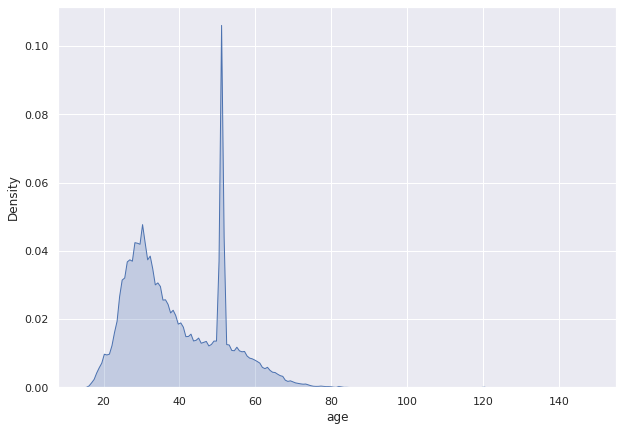

In [ ]:
df_age = df[['age']]
plt.figure(figsize=[10,7])
sns.kdeplot(df_age['age'], shade=True);

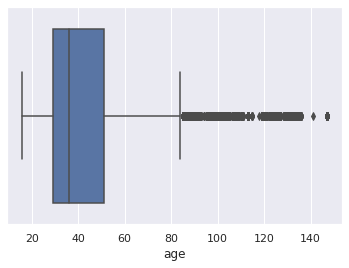

In [ ]:
sns.boxplot(x=df_age['age'])

In [ ]:
len(df_age[df_age['age']>85])

16027

We can see there ~16K outliers present in our dataset

## EDA


### How many trips are there in 2020? How many trips are there by Subscribers vs Customers?


#### Total trips in year 2020

In [ ]:
df.iloc[:,0].count()

19506857

#### Trips by Subscriber vs Customer

In [ ]:
df_pie = df['usertype'].value_counts()
df_pie

Subscriber    14955766
Customer       4551091
Name: usertype, dtype: int64

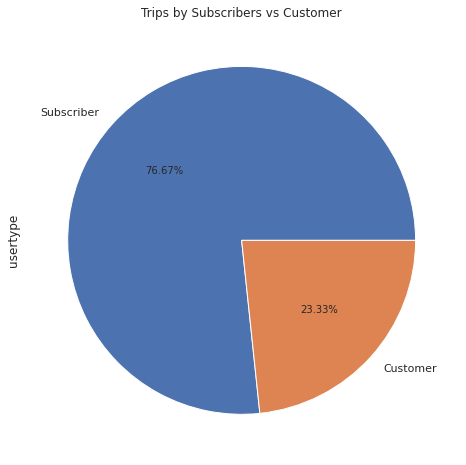

In [ ]:
plt.figure(figsize=[15,8])
df_pie.plot(kind='pie', autopct='%1.2f%%')
plt.title('Trips by Subscribers vs Customer');

* We can see in year 2020, 77% users were Subscribers.

### Plotting daily number of trips throughout the year 2020

In [ ]:
# lets take required data in new dataframe
df_plot = df[['starttime', 'start station id']]

In [ ]:
#groupping data with respect to date
df_plot_count = df_plot[['starttime']].groupby(df_plot['starttime'].dt.date).count().rename(columns={'starttime':'trips'})
df_plot_count.head()

,trips
starttime,
2020-01-01,18114
2020-01-02,41556
2020-01-03,31873
2020-01-04,29436
2020-01-05,27589


In [ ]:
# # Lets Plot this groupped data
# df_plot_count.plot();
# plt.rcParams["figure.figsize"] = (40,10)
# plt.title('Daily trips throughout year 2020');


In [ ]:
#for better understanding and more access to data
# we will plot data using plotly
fig = px.line(data_frame=df_plot_count ,x=df_plot_count.index, y=df_plot_count['trips'], title='Daily trips throughout year 2020')
fig.show()

* We can observe downtrend in Mid March
* Assuming this is effect of Covid-19 lockdown, but by the end of March, We can observe up trend in daily trips

###  distribution of number of trips by the day of the week during the year 2020

In [ ]:
# we will use daily count data and add new weekday column
df_weekdata = df_plot_count.reset_index().copy()
df_weekdata['starttime'] = pd.to_datetime(df_weekdata['starttime'])
#get day name 
df_weekdata['weekday'] = df_weekdata.starttime.dt.day_name()
df_weekdata.head()

,starttime,trips,weekday
0,2020-01-01,18114,Wednesday
1,2020-01-02,41556,Thursday
2,2020-01-03,31873,Friday
3,2020-01-04,29436,Saturday
4,2020-01-05,27589,Sunday


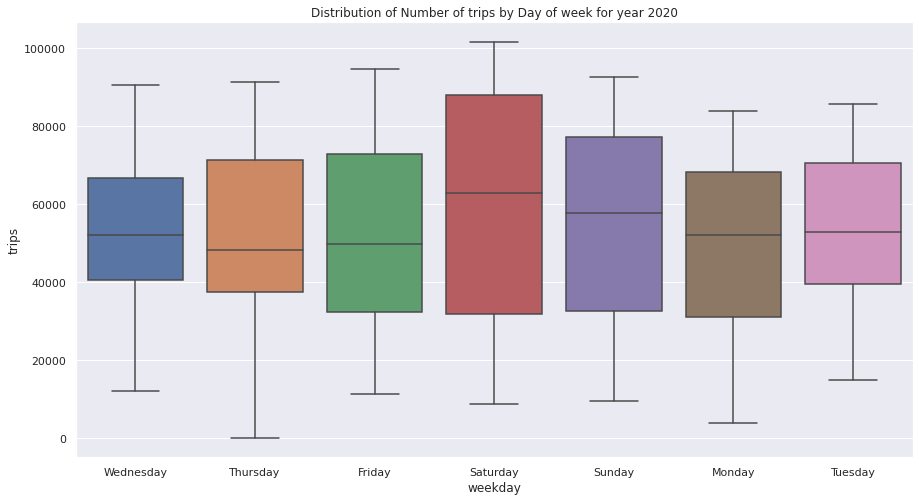

In [ ]:
plt.figure(figsize=[15,8])
plot=sns.boxplot(df_weekdata['weekday'],df_weekdata['trips'])
plt.title('Distribution of Number of trips by Day of week for year 2020')
plt.show();

From Above BoxPlot We can say:
* __Thursday__ was having __lowest__ average number of trips in year 2020 and __Saturaday__ was having __highest__ average number of trips
* __Saturday__ shows __largest variation__ throughout the year where __Wednesday__ shows __smallest variation__.

### Number of trips on Holidays throughout the year 2020

In [ ]:
# getting holdaiy dates
holiday_list = [d for i,d in enumerate(df_weekdata["starttime"]) if d in holidays.US()]

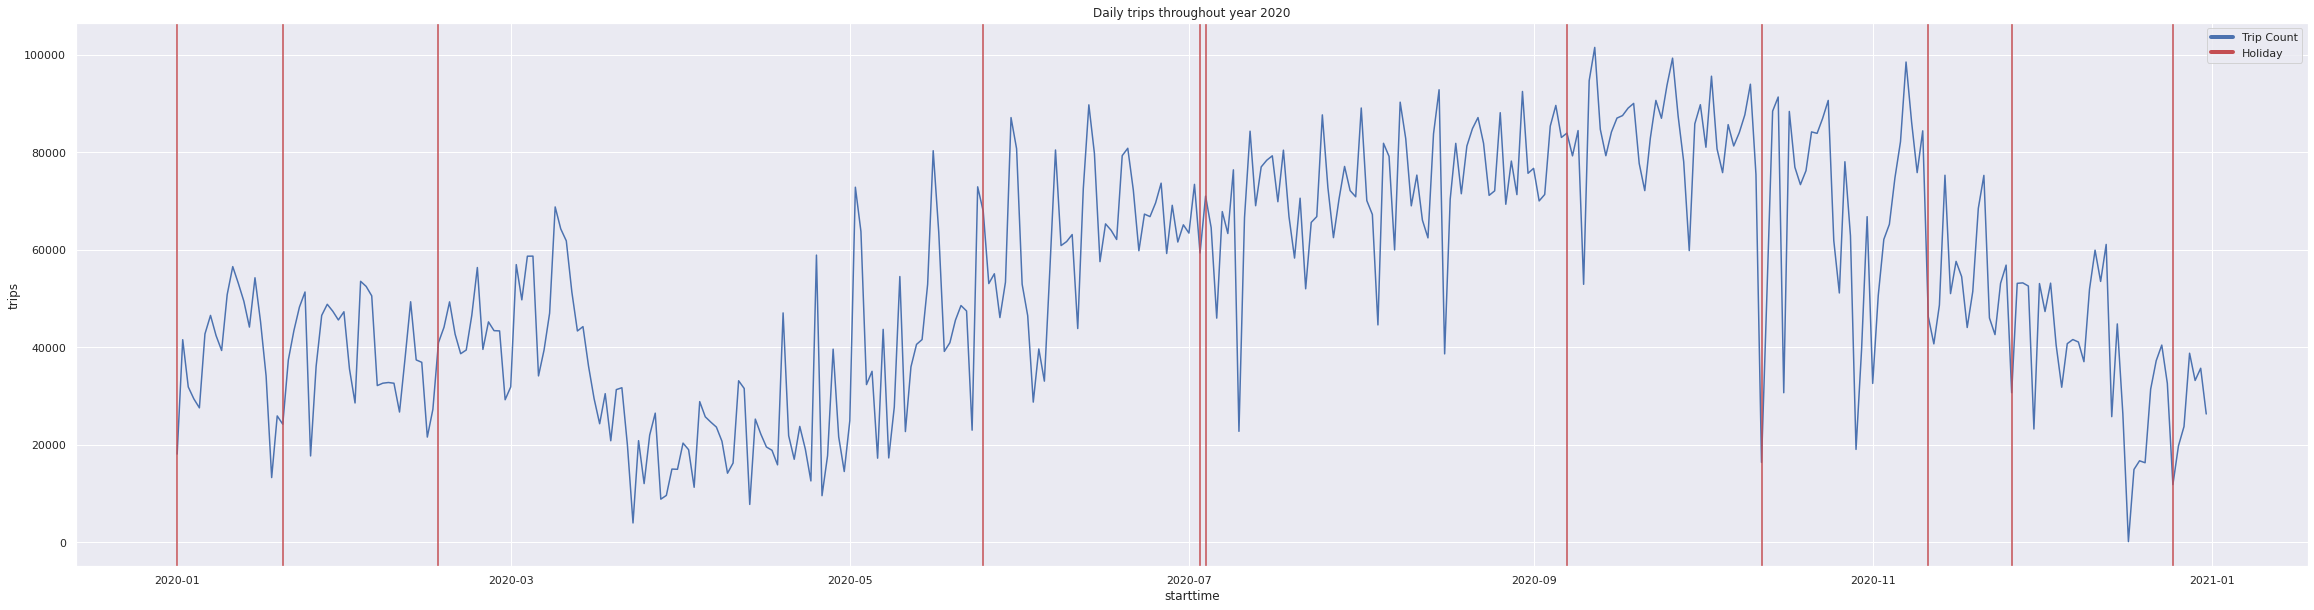

In [ ]:
# plotting normal line chart over Date
sns.lineplot(data=df_weekdata, x='starttime',y='trips')
plt.rcParams["figure.figsize"] = (30,10)
plt.title('Daily trips throughout year 2020');


# Thanks to: https://stackoverflow.com/questions/35906717/marking-specific-dates-when-visualizing-a-time-series
ax = plt.gca()
label_list = [df_weekdata['starttime'] for i in (holiday_list)]

for date_point in holiday_list:
    plt.axvline(x=date_point, color='r')


legend_elements = [Line2D([0], [0], color='b', lw=4, label='Trip Count'),
                Line2D([0], [0], color='r', lw=4, label='Holiday')]
plt.legend(handles=legend_elements)
plt.show()

* We can see small downtrend on Holidays

### Trip Time duration

In [ ]:
# creating copy of dataframe with required features
df_time = df[['starttime','duration_min','end station name']].copy()

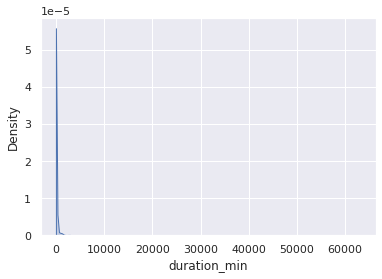

In [ ]:
# kde Plot
sns.kdeplot(data=df_time,x="duration_min", shade=True);

 Distribution is highly right skewed, We will find upper limit to declare outliers

***Assumptions :***<br>
Looking at the distribution of Trip duration data, My assumptions are:
* Maximum Trip duration in minute is 6000+ (100 Hours), which is clearly wrong
* If we think logically trip duration greater than 45-60 min makes no sense, and this are clearly Outlier due to some issue.
* We can assume issue is related to Trip ending functionality,There might be malfunction while ending trip, which is causing trip timer running.
<br>
<br>

Lets Find upper bound to declare outliers using IQR

In [ ]:
# find upper bound 
Q3 = np.quantile(df_time['duration_min'],0.75)
Q1 = np.quantile(df_time['duration_min'],0.25)
IQR = Q3-Q1
print(f"25th Percentile: {Q1}")
print(f"75th Percentile: {Q3}")
print(f"Median: {df_time['duration_min'].median()}")
print(f"IQR value is {IQR}")
print(f"Upper Limit is {Q3+1.5*IQR}")
print(f"Lower Limit is {Q1-1.5*IQR}")

25th Percentile: 7.0
75th Percentile: 23.0
Median: 13.0
IQR value is 16.0
Upper Limit is 47.0
Lower Limit is -17.0


Eventhough upper limit is __47__, We will consider __60__ as Upper limit, We will assume any thing upper than that is outlier which is caused by Malfunctions

Text(0.5, 1.0, 'Distribution of Trip Duration')

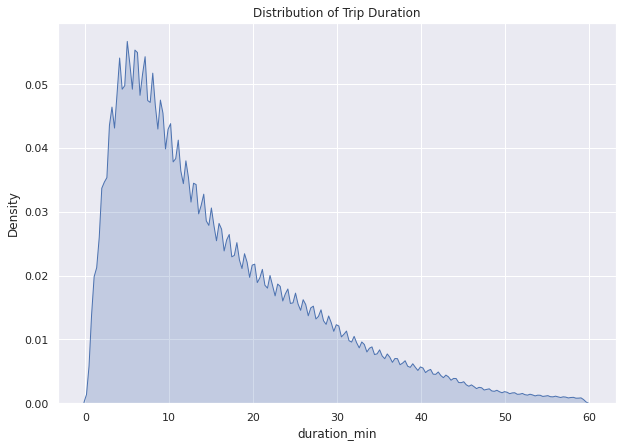

In [ ]:
temp = df_time[df_time['duration_min']<60]['duration_min']
plt.figure(figsize=[10,7])
sns.kdeplot(temp, shade=True)
plt.title('Distribution of Trip Duration')

* We can see majority of rides are for less time duration.

Text(0.5, 1.0, 'Top 10 Station with issue of Malfunction')

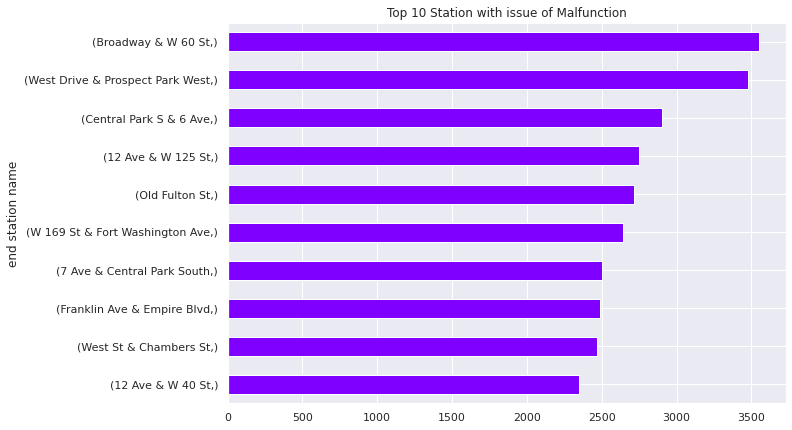

In [ ]:
# top 10 end station were we need to monitor for malfunction
df_time_10 = df_time[df_time['duration_min']>60][['end station name']].value_counts().head(10)
plt.figure(figsize=[10,7])
df_time_10.sort_values(ascending=True).plot(kind='barh', colormap='rainbow')
plt.title('Top 10 Station with issue of Malfunction')

### Bike and Station Analysis

In [ ]:
# creating copy of original dataset with required columns
df_bkst = df[['bikeid','start station id', 'starttime', 'end station id', 'stoptime', 'duration_min']].copy()
df_stations = df[['start station id','start station name']].copy().drop_duplicates(subset=['start station id','start station name']).reset_index(drop=True).rename(columns={'start station id':'station id','start station name':'station name'})

In [ ]:
bikeuse_df = df_bkst.groupby(['bikeid'])[['duration_min']].agg(Trips=('duration_min','count'),Usage=('duration_min','sum')).reset_index()

__Most Popular Bikes by number of times used__

In [ ]:
bikeuse_df['bikeid'] = bikeuse_df['bikeid'].astype('str')
bikeuse_df['bikeid'] = 'Bike '+ bikeuse_df['bikeid']

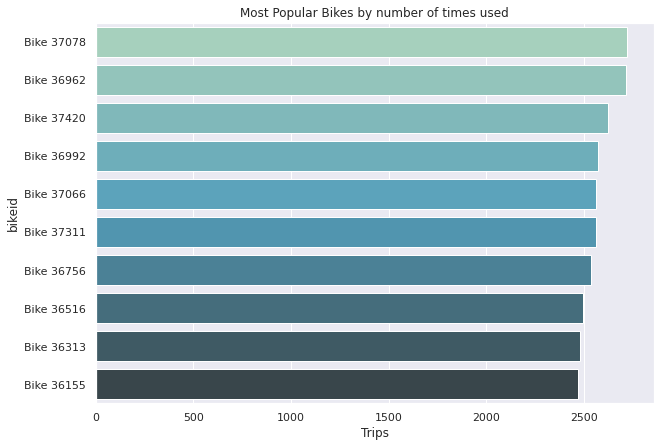

In [ ]:
temp = bikeuse_df.nlargest(10, 'Trips').set_index('bikeid')
plt.figure(figsize=[10,7])
ax = sns.barplot(data=temp ,x='Trips' ,y=temp.index, palette="GnBu_d", orient='h')
plt.title('Most Popular Bikes by number of times used');

__Most Popular Bikes by number of minutes used__

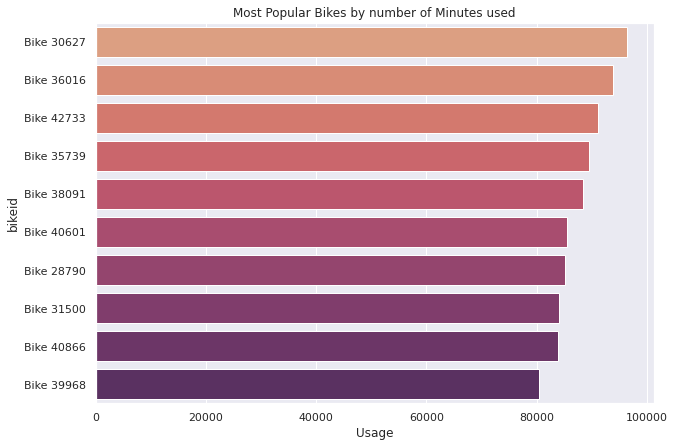

In [ ]:
temp = bikeuse_df.nlargest(10, 'Usage').set_index('bikeid')
plt.figure(figsize=[10,7])
ax = sns.barplot(data=temp ,x='Usage' ,y=temp.index, palette="flare", orient='h')
plt.title('Most Popular Bikes by number of Minutes used');

__Bike's Idle__<br>
bike’s “idle time” at any station as the time spent at that station between two consecutive trips. 
<br>
We will need bike's info, trip start and end time, start station and end station info.

In [ ]:
df_trip = df[['bikeid','starttime','stoptime','start station id','end station id']].copy()
# sorting data  with respect to bike starttime then endtime
df_trip = df_trip.sort_values(['bikeid','starttime','stoptime'])
df_trip.head()

,bikeid,starttime,stoptime,start station id,end station id
17349386,14529,2020-06-15 08:09:24.515,2020-06-15 08:27:41.751,285,168
17352731,14529,2020-06-15 09:28:06.218,2020-06-15 09:35:17.712,168,238
17353448,14529,2020-06-15 09:45:45.107,2020-06-15 09:57:42.830,238,224
17358852,14529,2020-06-15 12:06:48.352,2020-06-15 12:35:35.099,224,3783
17363293,14529,2020-06-15 13:30:04.811,2020-06-15 14:50:07.471,3783,346


* As data is sorted, wrt bike and time, We have same bike related data together and continuos
* For calculating idletime, __previous end station__ and __next startstation__ must be same, so we can say bike was idle at station, We will check our assumption

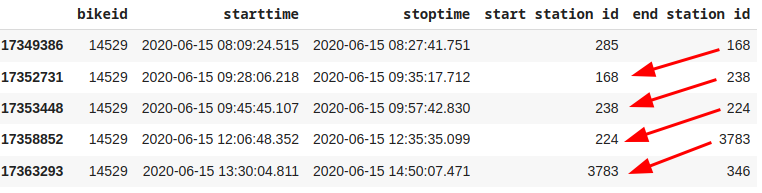

* We can see same pattern as per our assumption, after regroupping data, but we will also look for cases where both station are not same.

In [ ]:
# we will look into trips where current start staion is not same as previous end station
df_missMatch = df_trip[df_trip['start station id'] != df_trip['end station id'].shift(1)].copy()
print(f"Number of trips where station is mismatched: {df_missMatch.shape[0]}")
df_missMatch.head()

Number of trips where station is mismatched: 406114


,bikeid,starttime,stoptime,start station id,end station id
17349386,14529,2020-06-15 08:09:24.515,2020-06-15 08:27:41.751,285,168
17668904,14529,2020-06-19 21:58:09.187,2020-06-19 22:05:57.540,3295,3374
2518246,14529,2020-07-19 22:34:28.578,2020-07-19 22:49:45.897,3584,3423
3304412,14529,2020-07-31 15:49:57.856,2020-07-31 16:08:32.157,3302,3935
5131272,14529,2020-08-09 17:28:56.379,2020-08-09 17:59:38.164,3375,509


As we can see, there are 406114 trips where start station and end station of previous trip is different. As of now we can assume that, this bikes are relocated by Ciki bike crew, There might be less demand at this end station<br><br>
We will filter out records where we found this issue, and we will calculate idle time by difference of new start time and previous end time

In [ ]:
# diff of two times in minute
df_trip['idletime'] =(df_trip['starttime'] - df_trip['stoptime'].shift(1)).astype('timedelta64[m]')

# check if current bike and previous bike was same, if not we wont use this trip
df_trip['bike_same'] = np.where((df_trip['bikeid'] == df_trip['bikeid'].shift(1)),1,0)

# change Flag to False if station are diff
df_trip['flag'] = df_trip['start station id'] == df_trip['end station id'].shift(1)
df_trip

,bikeid,starttime,stoptime,start station id,end station id,idletime,bike_same,flag
17349386,14529,2020-06-15 08:09:24.515,2020-06-15 08:27:41.751,285,168,NaN,0,False
17352731,14529,2020-06-15 09:28:06.218,2020-06-15 09:35:17.712,168,238,60.0,1,True
17353448,14529,2020-06-15 09:45:45.107,2020-06-15 09:57:42.830,238,224,10.0,1,True
17358852,14529,2020-06-15 12:06:48.352,2020-06-15 12:35:35.099,224,3783,129.0,1,True
17363293,14529,2020-06-15 13:30:04.811,2020-06-15 14:50:07.471,3783,346,54.0,1,True
...,...,...,...,...,...,...,...,...
19308173,50106,2020-12-24 15:18:43.080,2020-12-24 15:31:39.487,434,3812,4503.0,1,True
19309208,50106,2020-12-24 15:36:59.379,2020-12-24 15:51:23.556,3812,3799,5.0,1,True
19312575,50106,2020-12-24 17:06:49.149,2020-12-24 17:13:57.996,3799,435,75.0,1,True
19312894,50106,2020-12-24 17:17:11.849,2020-12-24 17:21:10.699,435,470,3.0,1,True


In [ ]:
# Filtering data
df_trip = df_trip[df_trip['bike_same']==1]
df_trip = df_trip[df_trip['flag']==True]

In [ ]:
df_trip.tail()

,bikeid,starttime,stoptime,start station id,end station id,idletime,bike_same,flag
19184027,50106,2020-12-21 11:45:28.971,2020-12-21 12:15:21.980,3283,434,9.0,1,True
19308173,50106,2020-12-24 15:18:43.080,2020-12-24 15:31:39.487,434,3812,4503.0,1,True
19309208,50106,2020-12-24 15:36:59.379,2020-12-24 15:51:23.556,3812,3799,5.0,1,True
19312575,50106,2020-12-24 17:06:49.149,2020-12-24 17:13:57.996,3799,435,75.0,1,True
19312894,50106,2020-12-24 17:17:11.849,2020-12-24 17:21:10.699,435,470,3.0,1,True


We can use above data to find out busy and least busy station,<br>
__Now we will find Top 10 Busy stations for 15th April 2020__ 

In [ ]:
# filter data by date
df_april = df_trip[df_trip['starttime'].dt.strftime('%Y-%m-%d')=='2020-04-15']
df_april.head()

,bikeid,starttime,stoptime,start station id,end station id,idletime,bike_same,flag
10698483,14531,2020-04-15 18:09:40.747,2020-04-15 19:10:47.921,383,383,4332.0,1,True
10682975,14535,2020-04-15 07:13:35.810,2020-04-15 07:29:24.173,3581,3787,848.0,1,True
10703443,14535,2020-04-15 21:15:39.719,2020-04-15 21:31:51.356,3787,3581,826.0,1,True
10684003,14537,2020-04-15 08:33:32.731,2020-04-15 08:47:27.533,3314,3350,1351.0,1,True
10693181,14537,2020-04-15 15:57:41.030,2020-04-15 16:14:12.191,3350,499,430.0,1,True


In [ ]:
#Groupping data wrt station id
df_april_grp = df_april.groupby('start station id').agg(avg_idletime=('idletime','mean')).reset_index()

# Joining dataframe to get Station nam ewith station id
df_april_grp = df_april_grp.merge(df_stations, how='left',left_on='start station id', right_on='station id').set_index('station name').drop(columns=['start station id','station id'])

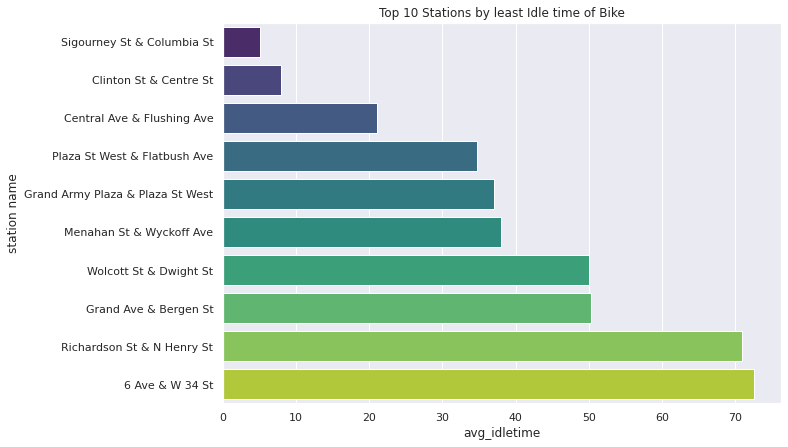

In [ ]:
# plotting Graph
temp = df_april_grp.nsmallest(10, 'avg_idletime')
plt.figure(figsize=[10,7])
ax = sns.barplot(data=temp ,x='avg_idletime' ,y=temp.index, palette="viridis", orient='h')
plt.title('Top 10 Stations by least Idle time of Bike');

## Conclusion:

* Datasets are huge in size, we can limit size by loading required columns in proper data types.
* Co-oridinates can be useful for plotting Map Visualization.
* Age column has values in range ~15 to ~140, And We can consider above 80 values as Outliers
<br>

* Total trips in year 2020: 19506857, in which __77% users were Subscribers__
* We can see __Downtrend__ in Usage of bikes __after 15th March 2020__, assuming this was effect of Covid-19 Lokdown. But immediately after __end of March__, We can see __Uptrend__ in Usage of Bike.
* People were using Bikes on Saturday more than anyother days in week.
* We observed some downtrends on Holidays.
* As we observed outliers in trip duration, We assumed that this was happed due to malfunction in Station, because of which Ride didn't ended properly.
* We Assumed Ride duration above 60 min as malfunction, and found top 10 station where we need to check and monitor issue.
* By applying bike's idle time logic, we discovered top 10 busy stations, And also found some stations from where Bike got transferred.

## Final Data:
We will create new dataframe with Daily trip count and weekday information, and also We will add new feature to indicate Holidays

In [ ]:
df_final = df_weekdata.rename(columns={'starttime':'Date', 'trips':'Trips', 'weekday':'Weekday'})
df_final['Holiday'] = [1 if d in holidays.US() else 0 for d in df_weekdata["starttime"]]
print(f"Total columns {df_final.shape[1]}\nTota Rows: {df_final.shape[0]}")
display(df_final.head())

Total columns 4
Tota Rows: 366


,Date,Trips,Weekday,Holiday
0,2020-01-01,18114,Wednesday,1
1,2020-01-02,41556,Thursday,0
2,2020-01-03,31873,Friday,0
3,2020-01-04,29436,Saturday,0
4,2020-01-05,27589,Sunday,0


In [ ]:
# saving final data as csv
df_final.to_csv('/content/drive/MyDrive/data/CitiBike2020.csv')

## References:
* Handling large data in Pandas : [Article_link](https://pythonspeed.com/articles/pandas-load-less-data/)
* Python Holidays Library : [Holidays](https://pypi.org/project/holidays/)
* Visualization cheatsheet: [link](https://www.data-to-viz.com/)
* Analysis by Others: [NYC-Taxi](https://medium.com/analytics-vidhya/exploratory-data-analysis-of-nyc-taxi-trip-duration-dataset-using-python-257fdef2749e) [NYC-Data science academy](https://nycdatascience.com/blog/student-works/embrace-the-new-normal-citi-bike-jersey-city-and-hoboken-data-analysis/)